<a href="https://colab.research.google.com/github/NatashaCamargo/TensorFlow2_0/blob/main/TF2_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#  get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-04-27 16:51:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-04-27 16:51:11 (49.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [6]:
# load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [7]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
# -1 => wildcard...put there watherver is left
# 
X = data[:,0].reshape(-1, 1)
y = data[:, 1]

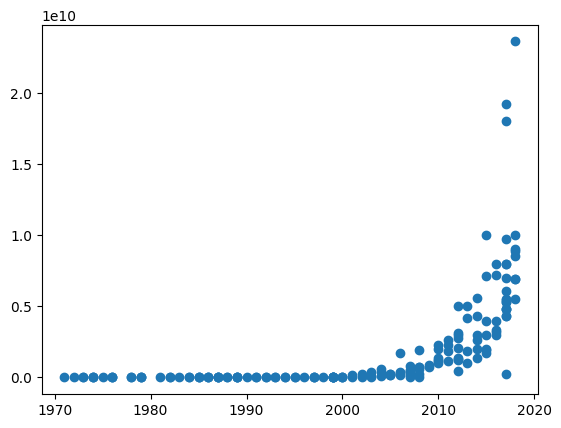

In [9]:
# plot the data
plt.scatter(X, y);

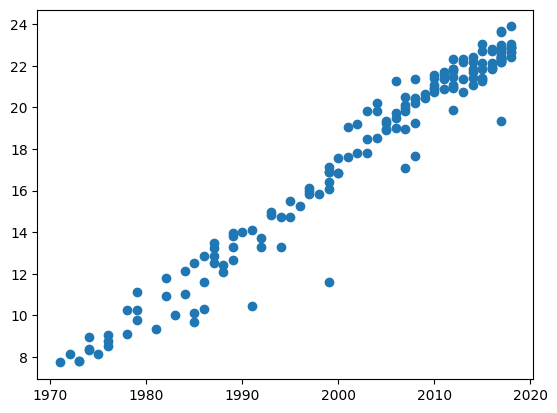

In [10]:
# as we have an exponential lets use a log so we can 
# turn it into something linear likish
y = np.log(y)
plt.scatter(X, y);


In [11]:
X = X - X.mean() # giving it zero mean we could standardize but has downsides

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [15]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [16]:
r = model.fit(X, y, epochs =200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 8ms/step - loss: 652.6031 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 600.5106 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 348.7048 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 244.5739 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 214.0981 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 132.6685 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 147.4515 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 145.8671 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 115.2536 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 59.2293 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step -

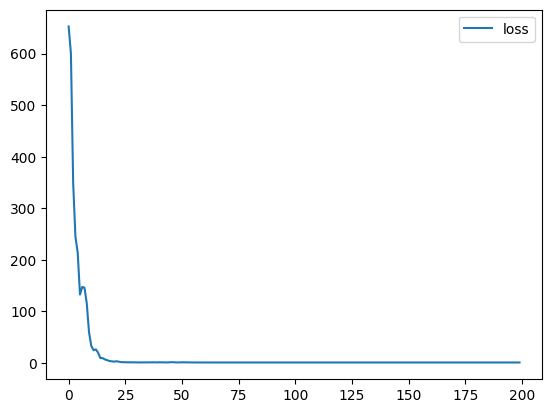

In [17]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [19]:
model.layers

In [20]:
model.layers[0].get_weights()
# 1st array 1x1 matrix: slope-how fast transistor count is growing

[array([[0.3427215]], dtype=float32), array([17.756865], dtype=float32)]

In [23]:
a = model.layers[0].get_weights()[0][0,0]

In [24]:
a

0.3427215